In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader


## Reading Dataset 

In [16]:
# Reading stocks.csv from local storage  
stock_df = pd.read_csv('C:\\Users\\Μακης\\Documents\\vscode_python\\random\\stocks.csv') 

print('First insight of the data  : \n')
stock_df.info() # Getting a  general view of the file and its contents  # (number of columns + their names -count(),Dtypes, indices + number of records) #doesnt need print

stock_df['Date_only'] = stock_df['Date'].str[:10]  #Adding a new column of the dates without time
stock_df['Date'] =pd.to_datetime(stock_df['Date'])




First insight of the data  : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295716 entries, 0 to 295715
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           295716 non-null  object 
 1   Open           295716 non-null  float64
 2   High           295716 non-null  float64
 3   Low            295716 non-null  float64
 4   Close          295716 non-null  float64
 5   Volume         295716 non-null  float64
 6   Brand_Name     295716 non-null  object 
 7   Ticker         295716 non-null  object 
 8   Industry_Tag   295716 non-null  object 
 9   Country        295716 non-null  object 
 10  Dividends      295716 non-null  float64
 11  Stock Splits   295716 non-null  float64
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 29.3+ MB


In [17]:
# Getting the number of unique dates 
number_of_dates = stock_df['Date'].nunique()  
# Getting the number of appearances of each  unique date
date_appearances = stock_df['Date'].value_counts()   
# Getting a ndarray of the  unique dates in the dataframe
dates_values = stock_df['Date'].unique()

#Finding the number of the  stocks in specific countries
germany_stocks = stock_df[stock_df['Country'] == 'germany']['Brand_Name'].value_counts()
japan_stocks = stock_df[stock_df['Country'] == 'japan']['Brand_Name'].value_counts()
netherlands_stocks = stock_df[stock_df['Country'] == 'netherlands']['Brand_Name'].value_counts()
france_stocks = stock_df[stock_df['Country'] == 'france']['Brand_Name'].value_counts()  
canada_stocks = stock_df[stock_df['Country'] == 'canada']['Brand_Name'].value_counts()
usa_stocks_ = stock_df[stock_df['Country'] == 'usa']['Brand_Name'].value_counts()

#General Insight 

print ('Number of Appearances of each unique date  :  \n',date_appearances,'\n')
print('The number of uniques dates the stocks are saved : ',number_of_dates,'\n')
print('The number of unique industry tags (Number of companies\'s categories-sections): \n ',stock_df['Industry_Tag'].nunique()) 
print('The stocks in each Industry : \n',stock_df['Industry_Tag'].value_counts()) 
print('These are Germany stocks brand names and records: \n',germany_stocks)
print('These are Japan stocks brand names and records: \n',japan_stocks)
print('These are Netherlands stocks brand names and records: \n',netherlands_stocks)
print('These are France stocks brand names and records: \n',france_stocks)
print('These are Canada stocks brand names and records: \n',canada_stocks)
print('These are USA stocks brand names and records: \n',usa_stocks_)
print('The number of stocks-records for each  country \n',stock_df['Country'].value_counts(), '\n') 
print ('Getting the number of records of each  Company(Brand_Name) in the Dataframe \n',stock_df['Brand_Name'].value_counts()) 


Number of Appearances of each unique date  :  
 2024-09-13 00:00:00-04:00    122
2024-08-30 00:00:00-04:00    122
2024-08-02 00:00:00-04:00    122
2024-08-09 00:00:00-04:00    122
2024-08-16 00:00:00-04:00    122
                            ... 
2001-08-01 00:00:00-04:00     34
2001-07-31 00:00:00-04:00     34
2001-07-30 00:00:00-04:00     34
2001-07-27 00:00:00-04:00     34
2000-01-03 00:00:00-05:00     34
Name: Date, Length: 6213, dtype: int64 

The number of uniques dates the stocks are saved :  6213 

The number of unique industry tags (Number of companies's categories-sections): 
  23
The stocks in each Industry : 
 technology            63859
retail                24923
automotive            23683
finance               21253
apparel               20127
food & beverage       18692
consumer goods        18690
entertainment         11864
food                  10937
footwear              10929
gaming                10835
aviation              10620
hospitality            9915
e-comme

In [18]:
#USA Stocks-Insight

# Getting a sub_dataframe that has USA Stocks  using boolean filter
usa_stocks = stock_df[stock_df['Country']=='usa'] 
# Getting a ndarray of all the unique usa companies 
usa_brand_names = usa_stocks['Brand_Name'].unique()  
print('USA Stocks : \n',usa_stocks, '\n' )
print('USA Stock Companies : \n',usa_brand_names,'\n') 
print( 'Number of USA stock Companies is : \n' ,len(usa_brand_names),'\n') #nunique() could be used too -> usa_stocks['Brand_Name].nunique()

# Top american companies  
tesla_stocks = usa_stocks[(usa_stocks['Brand_Name']== 'tesla' ) ].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True) #using drop_duplicates to remove records that are in the same day
amazon_stocks = usa_stocks[usa_stocks['Brand_Name']== 'amazon'].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True)  # if sort_values(inplace = True sort_values has inplace arguement to apply the sorting to the usa_stock dataframe too
nike_stocks  =  usa_stocks[usa_stocks['Brand_Name']== 'nike'].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True)
apple_stocks =  usa_stocks[usa_stocks['Brand_Name']== 'apple'].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True)    
google_stocks = usa_stocks[usa_stocks['Brand_Name']=='google'].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True)
nvidia_stocks =  usa_stocks[usa_stocks['Brand_Name']=='nvidia'].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True)
microsoft_stocks = usa_stocks[usa_stocks['Brand_Name']=='microsoft'].drop_duplicates(subset='Date_only').sort_values(by='Date_only', ascending=True)

USA Stocks : 
                              Date        Open        High         Low  \
0       2024-09-13 00:00:00-04:00    4.350000    4.750000    4.350000   
1       2024-09-13 00:00:00-04:00  227.949997  232.664001  226.320007   
2       2024-09-13 00:00:00-04:00  913.000000  923.829895  909.361023   
3       2024-09-13 00:00:00-04:00  186.949997  188.500000  185.910004   
4       2024-09-13 00:00:00-04:00  223.595001  224.029999  221.910004   
...                           ...         ...         ...         ...   
295711  2000-01-03 00:00:00-05:00    9.653981    9.765803    9.355788   
295712  2000-01-03 00:00:00-05:00   23.135441   23.295548   22.495014   
295713  2000-01-03 00:00:00-05:00   36.457976   36.846240   34.788441   
295714  2000-01-03 00:00:00-05:00   14.968750   15.593750   14.687500   
295715  2000-01-03 00:00:00-05:00    5.731675    5.793975    5.427959   

             Close      Volume                 Brand_Name Ticker Industry_Tag  \
0         4.730000  1236586

In [5]:
#Function for  plotting  a stock price over time
def stock_plots(df,plot_title, ytick_end,xtick_step,
                ytick_start=0,ytick_step=20,plot_linestyle='--',high_marker='*', low_marker='o',
                date_col='Date_only',close_col='Close',high_col='High',low_col='Low',
                figsize=(10,6),close_color='blue',high_color='red',low_color='black',close_zorder=10, high_zorder=8, low_zorder=9,
                xlabel='Stock Timeline',ylabel="Price($USD)"
    
                ):
 
  plt.figure(figsize=figsize)
  plt.plot(df[date_col], df[close_col],color=close_color,label='Closing_values',linestyle=plot_linestyle,zorder=close_zorder)
  plt.scatter(df[date_col],df[high_col],color = high_color,alpha=0.5,s=5,marker='*',label='High_points',zorder=high_zorder)
  plt.scatter(df[date_col],df[low_col],color =low_color,alpha=0.2,s=2,marker='o',label='Low_points',zorder=low_zorder) #  #the zorder controls the stacking order of the plot elements #alpha controls opacity and s:size? 
  plt.title(plot_title)
  plt.xlabel(xlabel)
  plt.xticks(df[date_col][::xtick_step],rotation=45) # x axis consists of dates with 150 day difference
  plt.ylabel(ylabel)
  plt.yticks(np.arange(ytick_start, ytick_end,ytick_step))   # Using np.arange to depict in  the graph the exact range of the stock prices  without adding additional y ticks and making the y axis bigger
  plt.legend()
  #plt.tight_layout()
  plt.show()
  plt.close()

## Plotting  popular stock prices over time

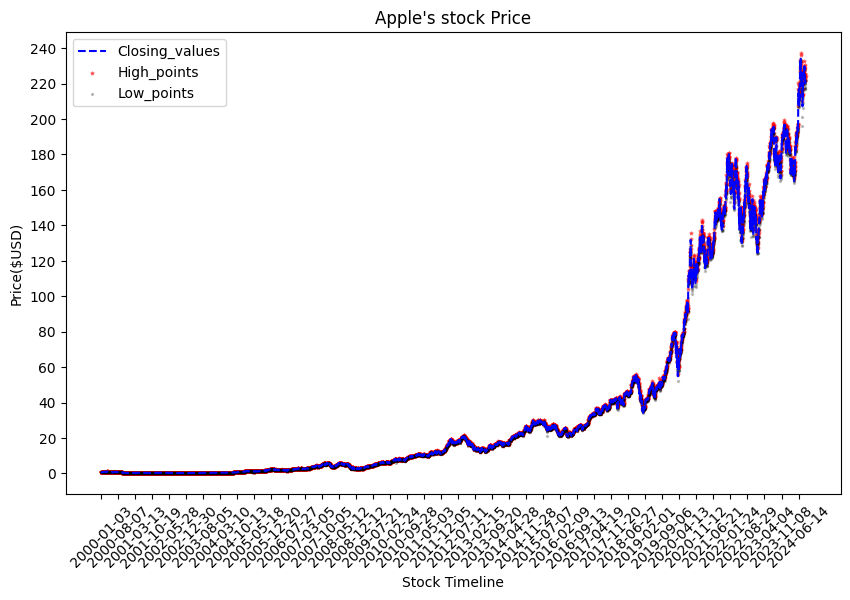

In [7]:
stock_plots(apple_stocks,plot_title='Apple\'s stock Price',xtick_step=150,ytick_end=260)

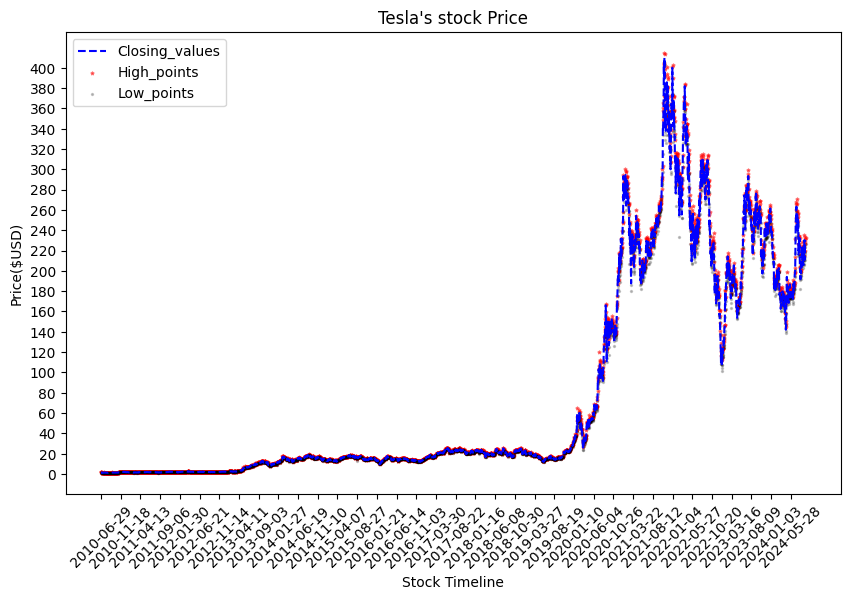

In [8]:
stock_plots(tesla_stocks,plot_title='Tesla\'s stock Price',xtick_step=100,ytick_end=420)

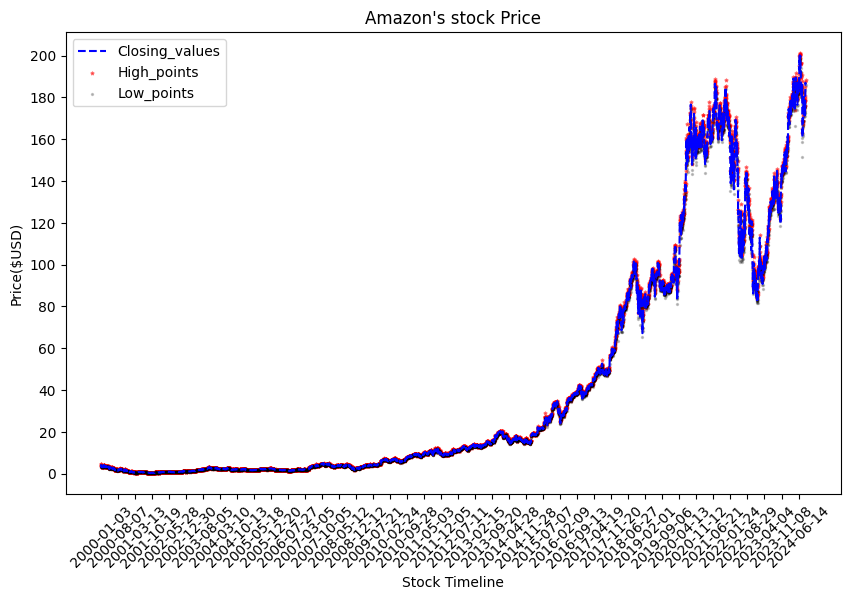

In [9]:
stock_plots(amazon_stocks,plot_title='Amazon\'s stock Price',xtick_step=150,ytick_end=220)

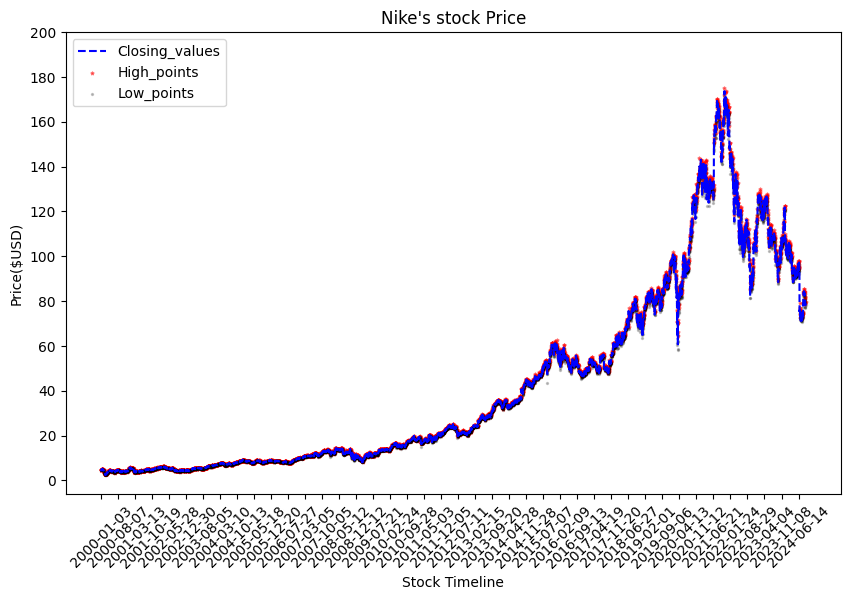

In [10]:
stock_plots(nike_stocks,plot_title='Nike\'s stock Price',xtick_step=150,ytick_end=220)

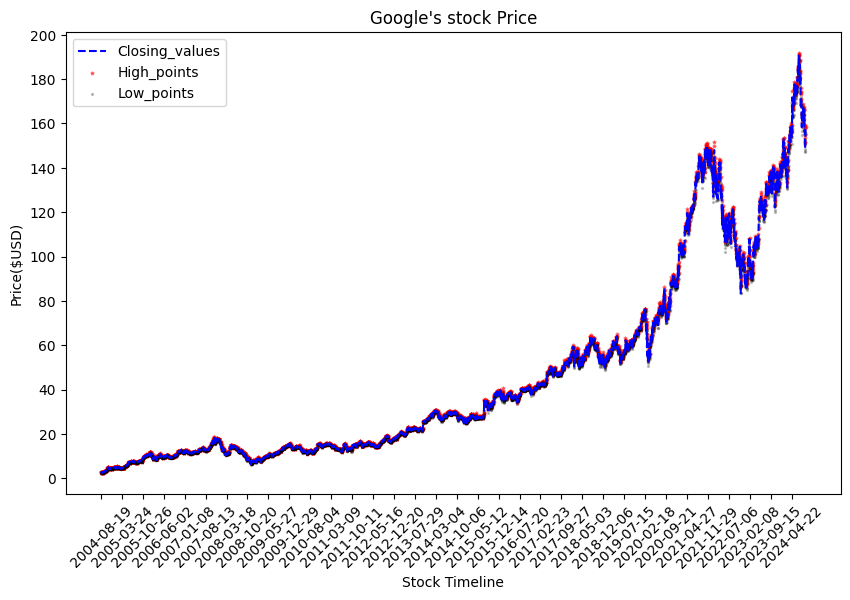

In [11]:
stock_plots(google_stocks,plot_title='Google\'s stock Price',xtick_step=150,ytick_end=220)

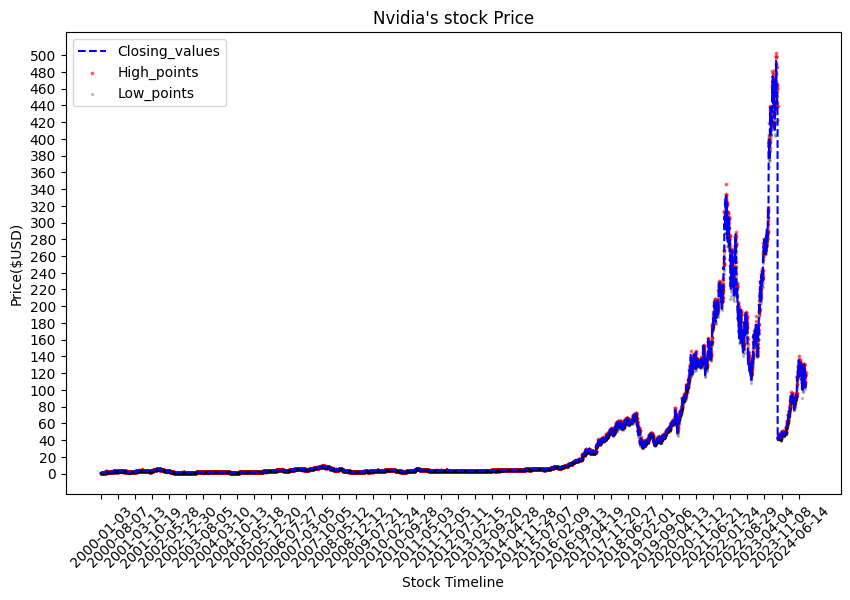

In [12]:
stock_plots(nvidia_stocks,plot_title='Nvidia\'s stock Price',xtick_step=150,ytick_end=520)

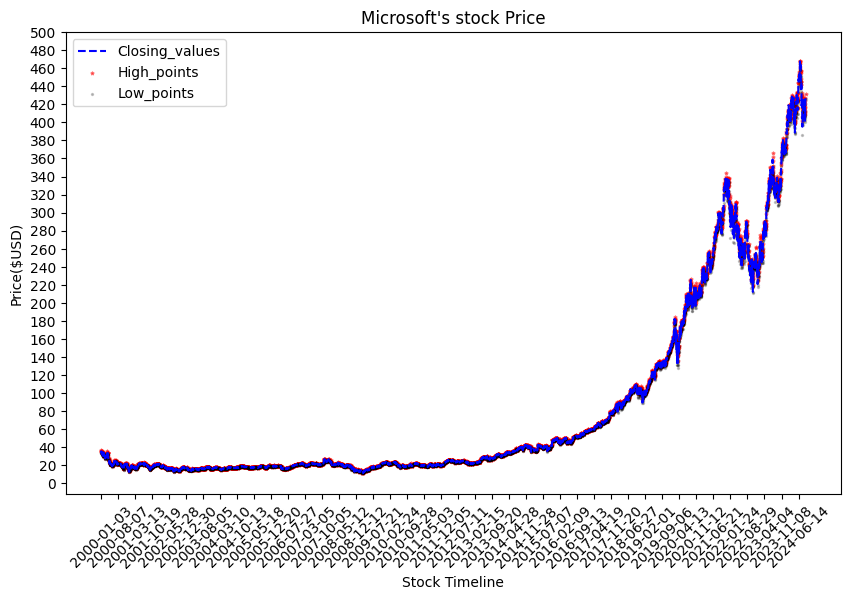

In [13]:
stock_plots(microsoft_stocks,plot_title='Microsoft\'s stock Price',xtick_step=150,ytick_end=520)

In [19]:
# Turning the dates from strings to datetime type
stock_df['Date_only']=pd.to_datetime(stock_df['Date_only'])

# Define the start and end dates as Timestamps
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-03-01')
# Picking the records  of stocks (SubDataframe)  in a specific timeline using lambda function and apply
timeline_stocks = stock_df[stock_df.apply(lambda rows: start_date <=rows['Date_only'] <=end_date,axis = 1)] # When using apply() on a DataFrame, each row(axis=1) or column(axis=0) of the DataFrame is automatically passed as an argument to the lambda function.
# timeline_stocks = stock_df[(stock_df['Date_only'] >= start_date ) & (stock_df['Date_only'] <= '2024-03-01')] another way to pick the  desired timeline_stocks

print('these are the stocks in the specific   timeline : \n',timeline_stocks ,'\n')

#removing the  duplicate days for each stock 
stock_df = stock_df.groupby('Brand_Name', group_keys=False).apply(lambda df: df.drop_duplicates(subset=['Date_only'])) #it is applied for each group 

these are the stocks in the specific   timeline : 
                             Date        Open        High         Low  \
9131   2024-03-01 00:00:00-05:00  739.253497  750.175968  738.065401   
9132   2024-03-01 00:00:00-05:00   34.059317   34.178683   33.462481   
9133   2024-03-01 00:00:00-05:00  157.229996  160.979996  156.811005   
9134   2024-03-01 00:00:00-05:00  599.809998  620.280029  599.500000   
9135   2024-03-01 00:00:00-05:00   58.967134   58.967134   58.415854   
...                          ...         ...         ...         ...   
11688  2024-01-02 00:00:00-05:00   44.650002   44.959999   42.799999   
11689  2024-01-02 00:00:00-05:00   92.699997   95.680000   92.180000   
11690  2024-01-02 00:00:00-05:00    5.960000    6.135000    5.770000   
11691  2024-01-02 00:00:00-05:00  291.488286  293.691378  291.488286   
11692  2024-01-02 00:00:00-05:00  104.204407  104.204407  104.204407   

            Close      Volume             Brand_Name Ticker     Industry_Tag  \
913

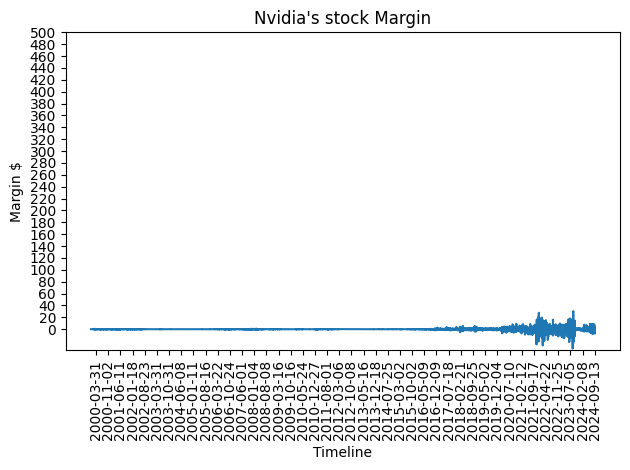

In [29]:
# Plot the profit-loss across timeline  for Nvidia 

# Finding the marging between the open  value price and the close  value price of stocks (finding if the stocked price rised or dropped in each date)
Margin = stock_df.apply(lambda rows: rows['Open']-rows['Close'],axis= 1) # apply() most likely returns a series pd.series can be used as a boolean filter  as above to form  a new Dataframe (timeline_stocks )
stock_df['Margin'] = Margin # Adding the Margin values for each record to the stock_df

# Nvidia Margin
nvidia_margin =  stock_df[stock_df['Brand_Name']=='nvidia']
plt.plot(nvidia_margin['Date_only'],nvidia_margin['Margin'])
plt.title('Nvidia\'s stock Margin' )
plt.xlabel('Timeline')
plt.xticks(nvidia_margin['Date_only'][::150],rotation=90)  
plt.yticks(nvidia_margin['Margin'][::150])
plt.ylabel('Margin $')
plt.yticks(np.arange(0,520,20))   #(tesla_stocks['Close'][::40])  #yticks([values -labels],])
#plt.legend()
plt.tight_layout()
plt.show()
#plt.close()

In [31]:
# Insight for  stocks with Dividends 

# Getting the stocks that have Dividends
stock_with_dividends =  stock_df[stock_df['Dividends']> 0 ].sort_values(by='Dividends',ascending=True).drop_duplicates(subset='Date_only') 

# Getting an ndarray (list) of the companies with dividends
list_of_stocks_with_div = stock_with_dividends['Brand_Name'].unique() 

# Grouping the records of the  stocks with dividends by Company
grouped_companies_with_div =stock_with_dividends.groupby(by='Brand_Name') # rows are grouped by the brand_name -> indices are groups  (creating a group object  each item of the group has(brand_name,records_of the group with the same brand_name)

# Picking  records of a specific group (nike)
#nike_records_with_dividends = grouped_companies_with_div.get_group('nike').sort_values(by='Dividends',ascending=True)
#print(nike_records_with_dividends,'\n') #returns the rows of nike group

print('Getting the number of stocks with dividends (#groups)  \n', grouped_companies_with_div.ngroups) # print(grouped.groups.keys()) / len(grouped_companies_with_div) #print('Number of Company stocks with dividends   \n',len(list_of_stocks_with_div))
print('The records of the stocks with dividends are  : \n',stock_with_dividends)
print ('Company Names of stocks with dividend  : \n',list_of_stocks_with_div)
print('Number of records of stocks with dividends  in each group: \n ',grouped_companies_with_div.size()) #calculates the rows in each group  (groups are rows with the same criterion-> brand_name )
print('Count non-NA values in each column per group  : \n',grouped_companies_with_div.count()) #works it has brand_names as indices unlike count() that has columns as indices
print('the maximum dividend of the Companies in each group : \n ',grouped_companies_with_div['Dividends'].max()) #if the column is not specified it returns  the maximum of each numeric column in each group

Getting the number of stocks with dividends (#groups)  
 44
The records of the stocks with dividends are  : 
                              Date        Open        High         Low  \
283577  2001-06-04 00:00:00-04:00   17.201802   17.237638   16.807593   
292212  2000-05-31 00:00:00-04:00   11.711457   11.860648   11.413077   
289945  2000-09-01 00:00:00-04:00   13.430705   13.468012   12.983015   
9051    2024-03-05 00:00:00-05:00   85.262996   86.089932   83.410152   
12783   2023-12-05 00:00:00-05:00   45.460130   46.593982   45.265155   
...                           ...         ...         ...         ...   
81083   2019-05-17 00:00:00-04:00   62.657768   62.657768   62.657768   
94375   2018-05-18 00:00:00-04:00   82.070412   82.070412   82.070412   
107940  2017-05-08 00:00:00-04:00  160.658487  160.695274  157.843792   
58850   2020-12-01 00:00:00-05:00  376.893785  380.393170  373.639454   
11836   2023-12-27 00:00:00-05:00  660.666875  666.528841  658.373944   

             

In [37]:

# Function to turn the stock_tickers to unique_integer_ids  (adding column ticker_id to initial stock_df)
def map_tickers_to_ids(df):
 unique_tickers = df["Ticker"].unique()
 ticker_to_id = {ticker: idx for idx, ticker in enumerate(unique_tickers)} #'key': 'value' dictionary comprehension creates a dict (tickers:ids),   enumarate generates an index for the list unique_tickers that contains tickers 
 df["Ticker_id"] = df["Ticker"].map(ticker_to_id) # creating the ticker_id column using  map(dictionary) that matches the tickers(keys) to the integers-ids
 return df,ticker_to_id # returning the tickers-id dictionary and the new dataframe



In [44]:
stocks_df_with_ids,id_ticker_dict = map_tickers_to_ids(stock_df)
print('number of tickets-unique stocks:  \n ' , len(id_ticker_dict) )#,'\n This is the dictionary tickers:ids  \n',id_ticket_dict)

#stocks_df_with_ids['Ticker_id','Ticker']) s interpreted by pandas as a tuple key, not as a list of columns. That's why it doesn't work as expected.

print('Printing the new column ticker_id of the dataframe :\n',stocks_df_with_ids[['Ticker_id', 'Ticker']])

print('This is the dict of ticker-ids : \n',id_ticker_dict)


number of tickets-unique stocks:  
  61
Printing the new column ticker_id of the dataframe :
        Ticker_id Ticker
56             0    MMM
171            0    MMM
211            0    MMM
293            0    MMM
324            0    MMM
...          ...    ...
65908         60     ZI
65949         60     ZI
65998         60     ZI
66039         60     ZI
66098         60     ZI

[294657 rows x 2 columns]
This is the dict of ticker-ids : 
 {'MMM': 0, 'ADDYY': 1, 'ADBE': 2, 'ABNB': 3, 'AMZN': 4, 'AMD': 5, 'AEO': 6, 'AXP': 7, 'AAPL': 8, 'SQ': 9, 'BAMXF': 10, 'CMG': 11, 'CSCO': 12, 'COIN': 13, 'CL': 14, 'COST': 15, 'CROX': 16, 'DAL': 17, 'FDX': 18, 'FL': 19, 'GOOGL': 20, 'HSY': 21, 'HLT': 22, 'HMC': 23, 'JNJ': 24, 'JPM': 25, 'LOGI': 26, 'LVMUY': 27, 'MAR': 28, 'MA': 29, 'MCD': 30, 'MSFT': 31, 'NFLX': 32, 'NKE': 33, 'NTDOY': 34, 'JWN': 35, 'NVDA': 36, 'PTON': 37, 'PHG': 38, 'PINS': 39, 'POAHY': 40, 'PG': 41, 'PMMAF': 42, 'RBLX': 43, 'CRM': 44, 'SHOP': 45, 'LUV': 46, 'SPOT': 47, 'SBUX': 48,

In [48]:
# Adds normalized stock values (column) to the initial stock_df dataframe
def normalize_stock_prices(df):
    scalers = {} # dictionary for unique scalers that normalize  the stock values  ticker:scaler
    normalized_data = [] # list for normalized stock values

    for ticker, stock_group_records in df.groupby(by="Ticker"):  #Internal pointers(ticker,group_row) of group object to enable efficient operations on each group (ticker->group_by criterion,stock_group_records->indices that contain the records)
        stock_group_records = stock_group_records.copy()  # Avoid modifying a view
        scaler = MinMaxScaler(feature_range=(0, 1)) # MinMaxScaler scales values between 0 and 1.
        stock_group_records["Normalized_Close"] = scaler.fit_transform(stock_group_records[["Close"]]) # computes min/max values of "Close" for the specific ticker-group and applies scaling. stock_group_records[["Close"]] ensures we pass a DataFrame (not a Series), which is required by MinMaxScaler.
        scalers[ticker] = scaler  #Saves each stock’s specific MinMaxScaler for future inverse transformations Dictionary that matches tickers  to scalers ('tickers':values)
        normalized_data.append(stock_group_records) #Stores the transformed stock values in each group in a list for later concatenation. This stores the transformed DataFrame copies in a list (normalized_data).
        # df["Normalized_Close"] = df.groupby("ticker")["Close"].transform(lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1, 1))) #function that adds normalized values as a column
    normalized_df = pd.concat(normalized_data) #This combines all transformed groups back into a single DataFrame, preserving all columns except that the "Close" column is now normalized.
    df=df.merge(normalized_df[["Ticker", "Date", "Normalized_Close"]], on=["Ticker", "Date"], how="right")
    return df, scalers #pd.concat(normalized_data): Merges all individual stock_dfs into a single DataFrame.

stock_df,scalers = normalize_stock_prices(stock_df)

In [47]:

# Sorted stock by ticker
stock_df = stock_df.sort_values(by=['Ticker','Date_only'], ascending=True ) 
stock_df.reset_index(drop=True,inplace=True) #restarting the records from zero indice
print('this is sorted stock_df by ticker and date :  \n',stock_df.head(20))


this is sorted stock_df by ticker and date :  
                          Date      Open      High       Low     Close  \
0   2000-01-03 00:00:00-05:00  0.794800  0.852586  0.770643  0.848323   
1   2000-01-04 00:00:00-05:00  0.820377  0.838376  0.766854  0.776801   
2   2000-01-05 00:00:00-05:00  0.786273  0.837902  0.780590  0.788168   
3   2000-01-06 00:00:00-05:00  0.804273  0.810904  0.719961  0.719961   
4   2000-01-07 00:00:00-05:00  0.731329  0.765433  0.723751  0.754065   
5   2000-01-10 00:00:00-05:00  0.773011  0.774905  0.718067  0.740802   
6   2000-01-11 00:00:00-05:00  0.727066  0.753118  0.685858  0.702910   
7   2000-01-12 00:00:00-05:00  0.719961  0.723751  0.655543  0.660754   
8   2000-01-13 00:00:00-05:00  0.716053  0.748381  0.701015  0.733224   
9   2000-01-14 00:00:00-05:00  0.757854  0.774906  0.753118  0.761169   
10  2000-01-18 00:00:00-05:00  0.765433  0.803326  0.761169  0.787694   
11  2000-01-19 00:00:00-05:00  0.800483  0.824166  0.783432  0.807589   
12 

## Function to find continious dates for each stock  in order to train a stock predictor based on continious sequences

In [52]:

def filter_continuous_dates(df,sequence_length):
 groups = df.groupby('Brand_Name') #.sort_values(by='Date_only',ascending='True')
 saved_sequences = {}

 for brand_name,group in groups:
  temp_sequence = []  # Initialize the temp_sequence inside the loop
    
      # Start with the first date of each group
  temp_sequence.append(group.iloc[0]['Date_only'])
  for i in range(1, len(group)):
          
         prev_date = group.iloc[i - 1]['Date_only'] #first date
         curr_date = group.iloc[i]['Date_only'] #next date
        # ticker = group.iloc[i]['Ticker']
     
         if (curr_date - prev_date).days == 1:  # Check if the gap is exactly 1 day
                temp_sequence.append(curr_date)
         else:
                temp_sequence = [curr_date]
 
 #temp_sequence = [curr_date]
         if len(temp_sequence) >=sequence_length :
                if brand_name not in saved_sequences:
                 saved_sequences[brand_name] = []  # Initialize the list if needed   
                saved_sequences[brand_name].append(temp_sequence)
 # After the loop, check if the last sequence is valid and save it
  if len(temp_sequence) >= sequence_length:
            if brand_name not in saved_sequences:
                saved_sequences[brand_name] = []  # Initialize the list if needed
            saved_sequences[brand_name].append(temp_sequence)  # Append the sequence

 return saved_sequences 

continious_dates_dict = filter_continuous_dates(stock_df,5)



In [58]:
#checking results
print(len(continious_dates_dict))
for brand, sequences in list(continious_dates_dict.items())[:3]:  # first 3 brands
    print(f"\nBrand: {brand}")
    print(len(sequences))
    for seq in sequences[:2]:  # first 2 sequences per brand
        print(seq)
#print(continious_dates_dict[0:100])
brands = list(continious_dates_dict.keys())
print(brands)


61

Brand: 3m
1063
[Timestamp('2000-01-03 00:00:00'), Timestamp('2000-01-04 00:00:00'), Timestamp('2000-01-05 00:00:00'), Timestamp('2000-01-06 00:00:00'), Timestamp('2000-01-07 00:00:00')]
[Timestamp('2000-01-10 00:00:00'), Timestamp('2000-01-11 00:00:00'), Timestamp('2000-01-12 00:00:00'), Timestamp('2000-01-13 00:00:00'), Timestamp('2000-01-14 00:00:00')]

Brand: adidas
787
[Timestamp('2006-06-05 00:00:00'), Timestamp('2006-06-06 00:00:00'), Timestamp('2006-06-07 00:00:00'), Timestamp('2006-06-08 00:00:00'), Timestamp('2006-06-09 00:00:00')]
[Timestamp('2006-06-12 00:00:00'), Timestamp('2006-06-13 00:00:00'), Timestamp('2006-06-14 00:00:00'), Timestamp('2006-06-15 00:00:00'), Timestamp('2006-06-16 00:00:00')]

Brand: adobe
1063
[Timestamp('2000-01-03 00:00:00'), Timestamp('2000-01-04 00:00:00'), Timestamp('2000-01-05 00:00:00'), Timestamp('2000-01-06 00:00:00'), Timestamp('2000-01-07 00:00:00')]
[Timestamp('2000-01-10 00:00:00'), Timestamp('2000-01-11 00:00:00'), Timestamp('2000-01-

## Function to form the final dataframe that contains continious dates of stocks  for  a stock_predictor LSTM

In [60]:

def  filter_dataframe(dt_dates,df) :
    filtered_dfs = []  # List to collect filtered DataFrames
  
   # final_dataframe = pd.DataFrame()
    for brand_name,sequences in dt_dates.items(): # The items() method returns a view object. The view object contains the key-value pairs of the dictionary, as tuples in a list.    
       for sequence in sequences: #shape of sequences ...++
        new_df =  df[(df['Brand_Name'] == brand_name) & (df['Date_only'].isin(sequence))] 
        
        filtered_dfs.append(new_df) 
    final_dataframe = pd.concat(filtered_dfs, ignore_index=True)
    return final_dataframe


In [ ]:
stock_df = filter_dataframe(continious_dates_dict,stock_df)
print(stock_df.head(3))
#stock_df.to_csv('stock_dataframe.csv') # Saving the final dataframe that is gonna be used to extract a training dataset for LSTM model